In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")
df.sample(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
535,Hero Honda CD Deluxe,12000,2007,Individual,2nd owner,100000,NaN
233,Honda CB Hornet 160R,95000,2019,Individual,1st owner,8000,94703.0
890,Royal Enfield Classic Chrome,185000,2015,Individual,2nd owner,5000,189313.0
851,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
122,Royal Enfield Classic Gunmetal Grey,135000,2018,Individual,1st owner,6100,148114.0
542,Yamaha Fazer 25,115000,2018,Individual,1st owner,11000,142680.0
902,Yamaha YZF R15 [2011-2018],80000,2013,Dealer,1st owner,30000,118997.0
70,Mahindra Mojo XT300,165000,2017,Individual,1st owner,1933,195500.0
331,Bajaj Pulsar 135 LS,23000,2010,Individual,1st owner,77000,64589.0
629,Yamaha YZF R15 [2011-2018],80000,2017,Individual,1st owner,27000,118997.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.columns.values

array(['name', 'selling_price', 'year', 'seller_type', 'owner',
       'km_driven', 'ex_showroom_price'], dtype=object)

# Q-1) What is the range of selling prices in the dataset?

Ans)

In [5]:
df["selling_price"]

price_range = df['selling_price'].max() - df['selling_price'].min()

print("Range of Selling Prices:", price_range)

Range of Selling Prices: 755000


# Q-2) What is the median selling price for bikes in the dataset?

Ans)

In [6]:
df["selling_price"].median()

45000.0

#Q-3) What is the most common seller type?

Ans)

In [7]:
most_common_seller = df["seller_type"].value_counts().idxmax()

print("Most common seller: -> " , most_common_seller)

Most common seller: ->  Individual


# Q-4) How many bikes have driven more than 50,000 kilometers?

Ans)

In [9]:
km_driven = df[df["km_driven"] > 50000].value_counts().shape[0]

print("Number of bikes more than 50,000 km are : " ,km_driven )

Number of bikes more than 50,000 km are :  86


# Q-5) What is the average km_driven value for each ownership type?

Ans)

In [16]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


# Q-6) What proportion of bikes are from the year 2015 or older?

Ans)

In [21]:
proportion = (len(df[df["year"] <= 2015]) / len(df)) * 100
print(proportion)

56.64467483506126


# Q-7)  What is the trend of missing values across the dataset?

Ans)

In [26]:
missing_value = df.isnull().sum()/ len(df) *100

miss_val_per = pd.DataFrame({"missing values":missing_value})
miss_val_per

,missing values
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


# Q-8) What is the highest ex_showroom_price recorded, and for which bike?

Ans)

In [35]:
max_price = df["ex_showroom_price"].max()

bike_with_max_price = df[df["ex_showroom_price"] == max_price][["name", "ex_showroom_price"]]
print(bike_with_max_price)


                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


Q-9) What is the total number of bikes listed by each seller type?

Ans)

In [37]:
df["seller_type"].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


# Q-10)  What is the relationship between selling_price and km_driven for first-owner bikes?

Ans)

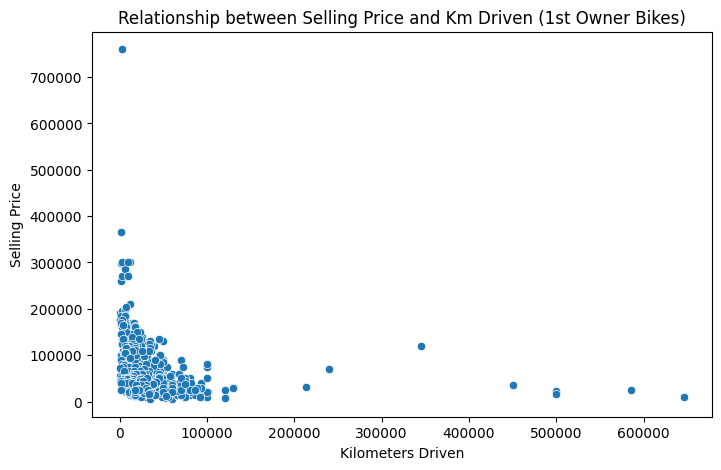

Correlation: -0.2434817484496572


In [41]:
first_owner_bikes = df[df["owner"] == "1st owner"]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between Selling Price and Km Driven (1st Owner Bikes)")
plt.show()

correlation = first_owner_bikes["km_driven"].corr(first_owner_bikes["selling_price"])
print(f"Correlation: {correlation}")


# Q-11) Identify and remove outliers in the km_driven column using the IQR method?

Ans)

In [42]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["km_driven"] < lower_bound) | (df["km_driven"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
print(f"New dataset shape: {df_cleaned.shape}")


Number of outliers: 39
New dataset shape: (1022, 7)


#Q-12)  Perform a bivariate analysis to visualize the relationship between year and selling_price.

Ans)

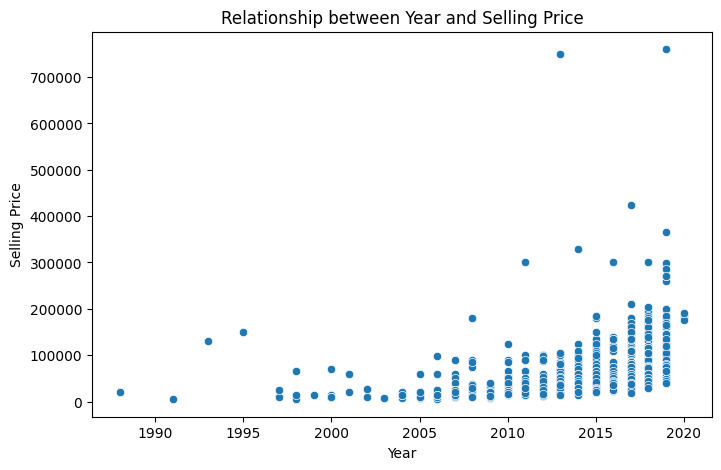

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Relationship between Year and Selling Price")
plt.show()

#Q-13) What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

Ans)

In [46]:
current_year = 2025
df["bike_age"] = current_year - df["year"]

avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
print(avg_depreciation)


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


# Q-14)  Which bike names are priced significantly above the average price for their manufacturing year?

Ans)

In [51]:
yearly_avg_price = df.groupby("year")["selling_price"].mean()

df["yearly_avg_price"] = df["year"].map(yearly_avg_price)
df_high_price = df[df["selling_price"] > 1.5 * df["yearly_avg_price"]]

high_priced_bikes = df_high_price[["name", "year", "selling_price", "yearly_avg_price"]]
frame = pd.DataFrame(high_priced_bikes)
frame



,name,year,selling_price,yearly_avg_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


# Q-15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.

Ans)

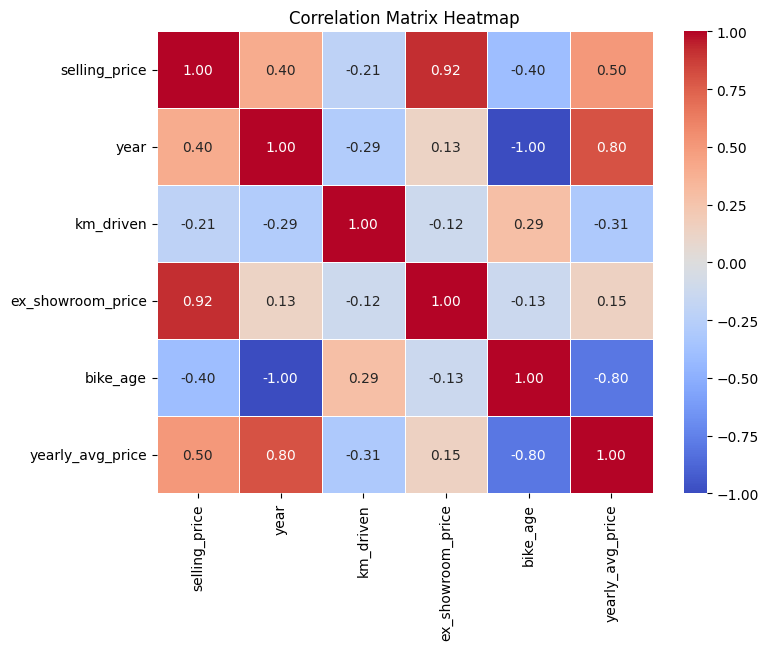

In [53]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


---
---

### **Car-Sales** Dataset

---
---



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df2 = pd.read_csv('Car Sale.csv')
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


# Q-1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Ans)

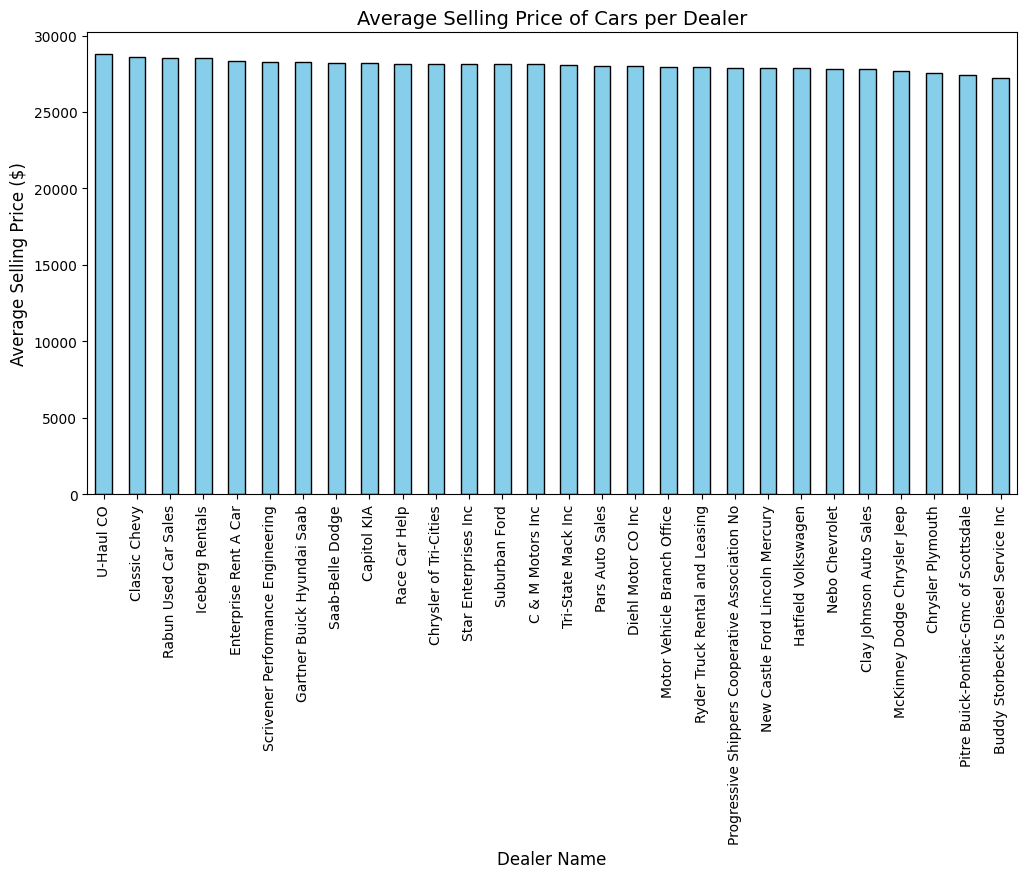

In [64]:
avg_price_per_dealer = df2.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_price_per_dealer.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Dealer Name", fontsize=12)
plt.ylabel("Average Selling Price ($)", fontsize=12)
plt.title("Average Selling Price of Cars per Dealer", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Q-2)  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

Ans)

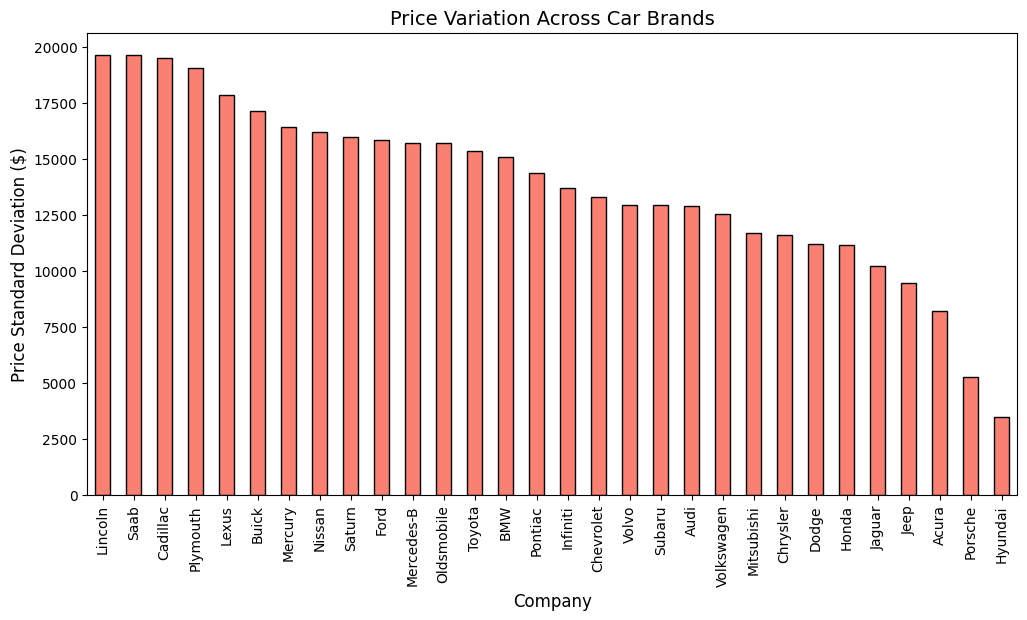

In [69]:
price_variation_per_company = df2.groupby("Company")["Price ($)"].std().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
price_variation_per_company.plot(kind="bar", color="salmon", edgecolor="black")

plt.xlabel("Company", fontsize=12)
plt.ylabel("Price Standard Deviation ($)", fontsize=12)
plt.title("Price Variation Across Car Brands", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Q-3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

Ans)

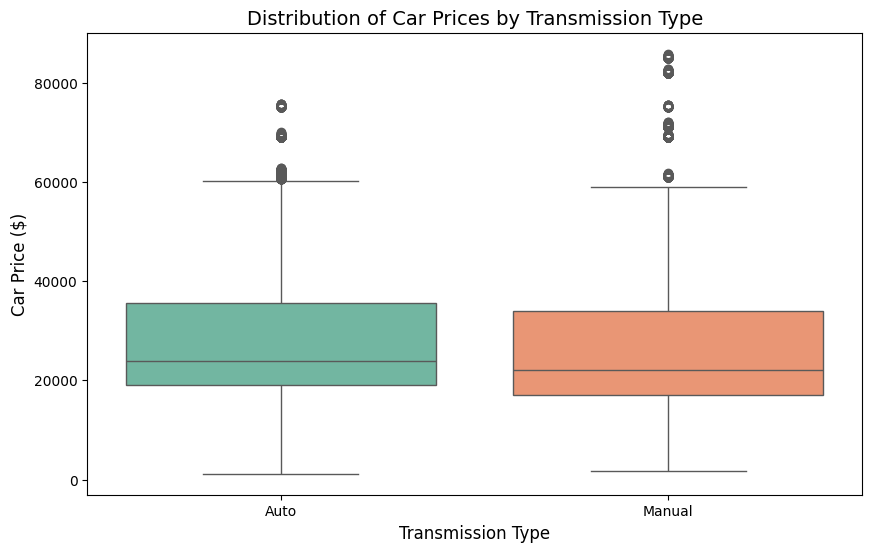

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transmission", y="Price ($)", data=df2, palette="Set2")
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Distribution of Car Prices by Transmission Type", fontsize=14)
plt.show()


# Q-4)  What is the distribution of car prices across different regions?

Ans)

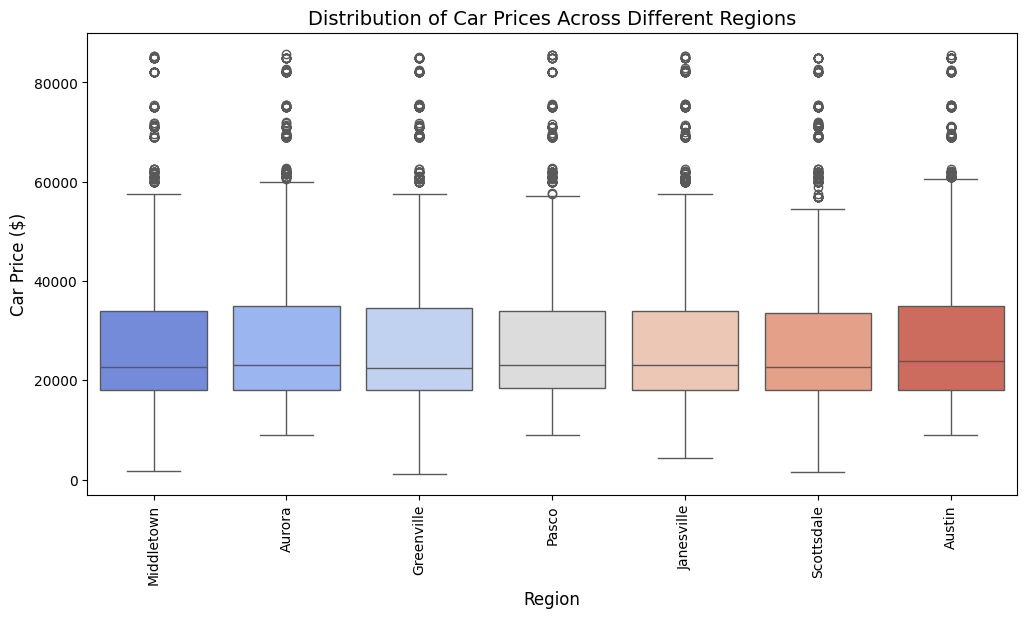

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df2, palette="coolwarm")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Distribution of Car Prices Across Different Regions", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Q-5) What is the distribution of cars based on body styles?

Ans)

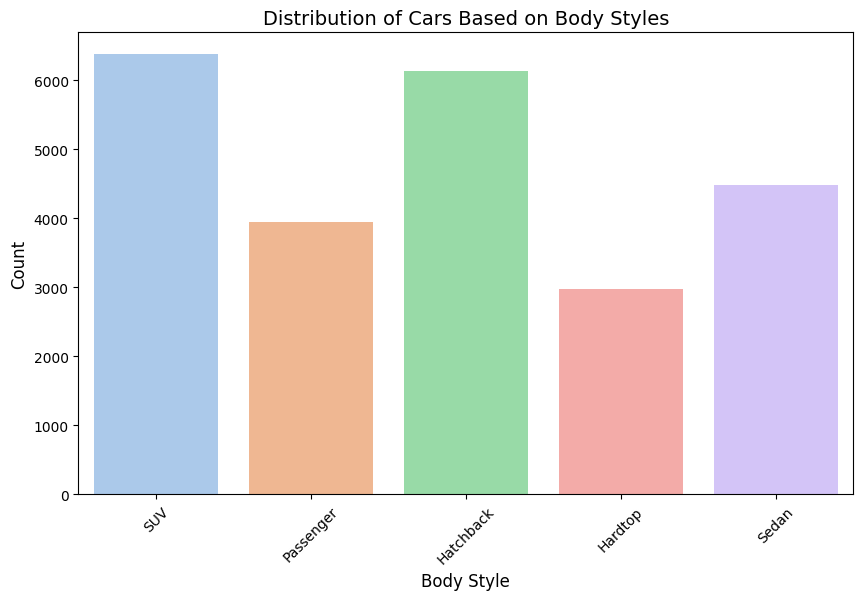

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Style", data=df2, palette="pastel")
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Cars Based on Body Styles", fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Q-6) How does the average selling price of cars vary by customer gender and annual income?

Ans)

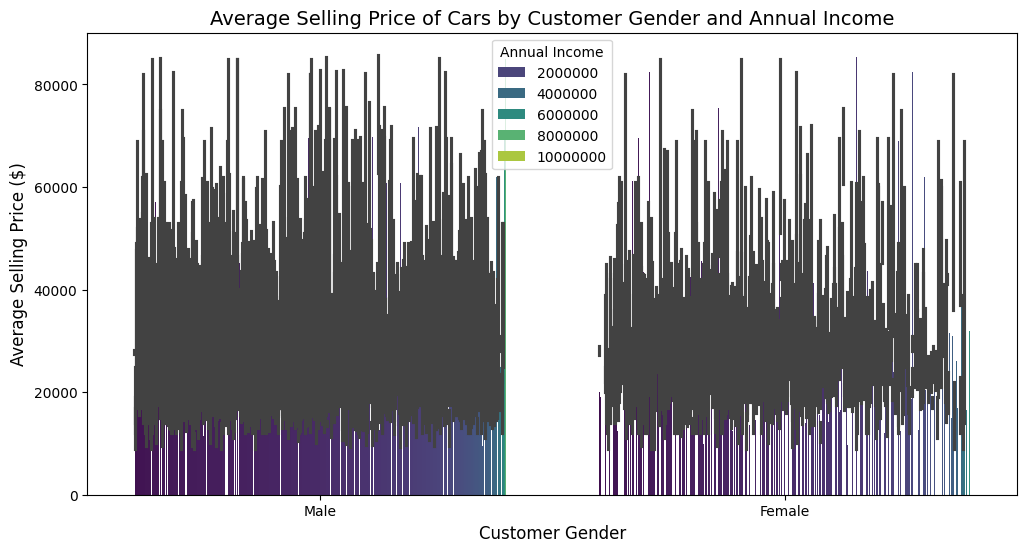

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Gender", y="Price ($)", hue="Annual Income", data=df2, palette="viridis")
plt.xlabel("Customer Gender", fontsize=12)
plt.ylabel("Average Selling Price ($)", fontsize=12)
plt.title("Average Selling Price of Cars by Customer Gender and Annual Income", fontsize=14)
plt.show()

# Q-7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

Ans)

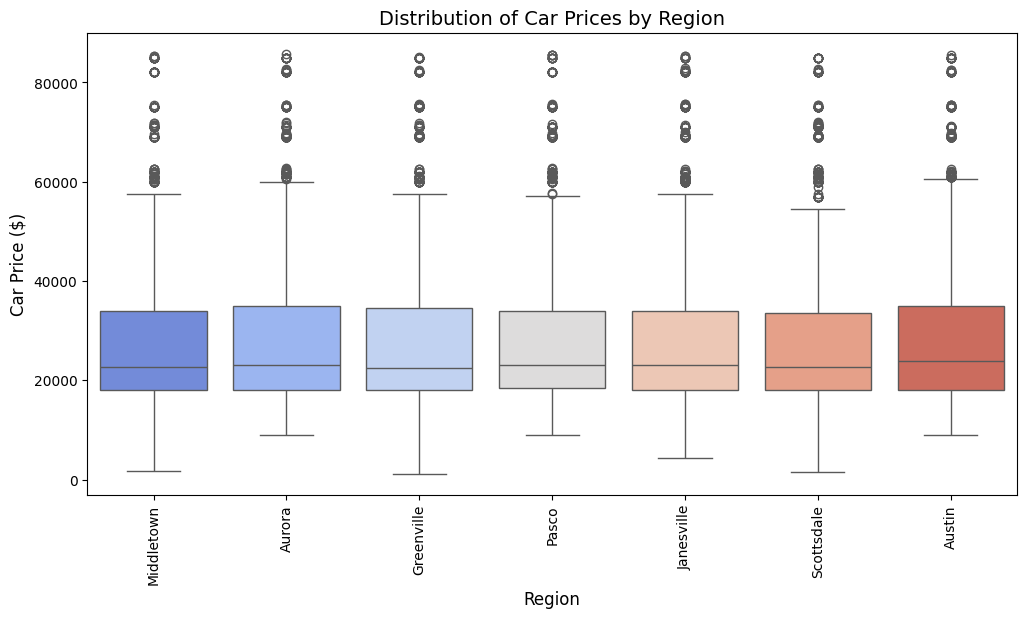

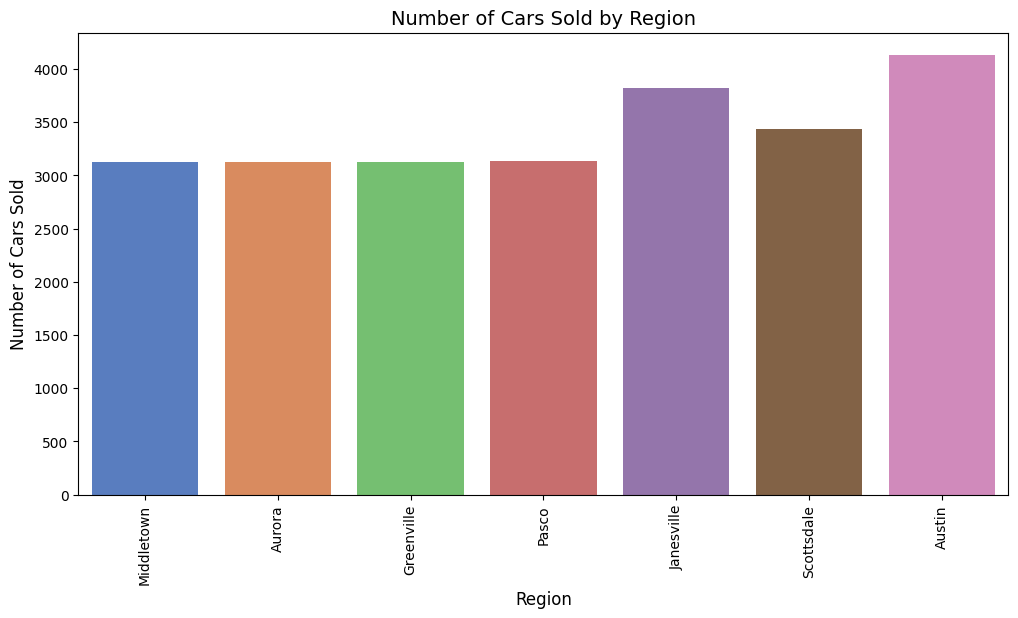

In [79]:
# Boxplot to show the distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df2, palette="coolwarm")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Distribution of Car Prices by Region", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Countplot to show the number of cars sold by region
plt.figure(figsize=(12, 6))
sns.countplot(x="Dealer_Region", data=df2, palette="muted")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Cars Sold", fontsize=12)
plt.title("Number of Cars Sold by Region", fontsize=14)
plt.xticks(rotation=90)
plt.show()


# Q-8) How does the average car price differ between cars with different engine sizes?

Ans)

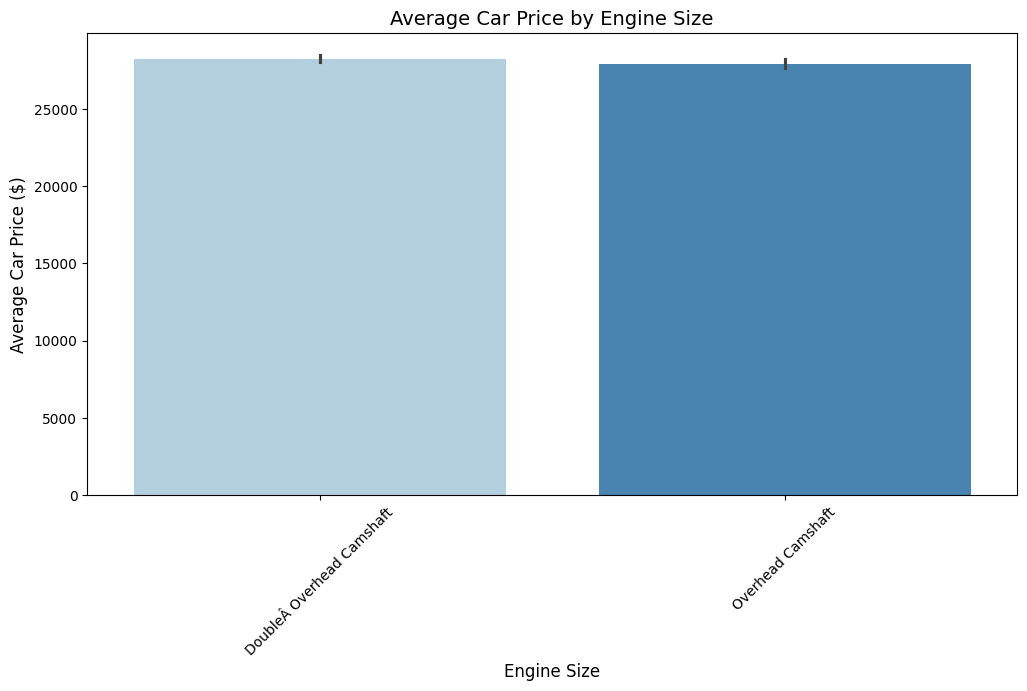

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Engine", y="Price ($)", data=df2, palette="Blues")
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Average Car Price ($)", fontsize=12)
plt.title("Average Car Price by Engine Size", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Q-9)  How do car prices vary based on the customer’s annual income bracket?

Ans)

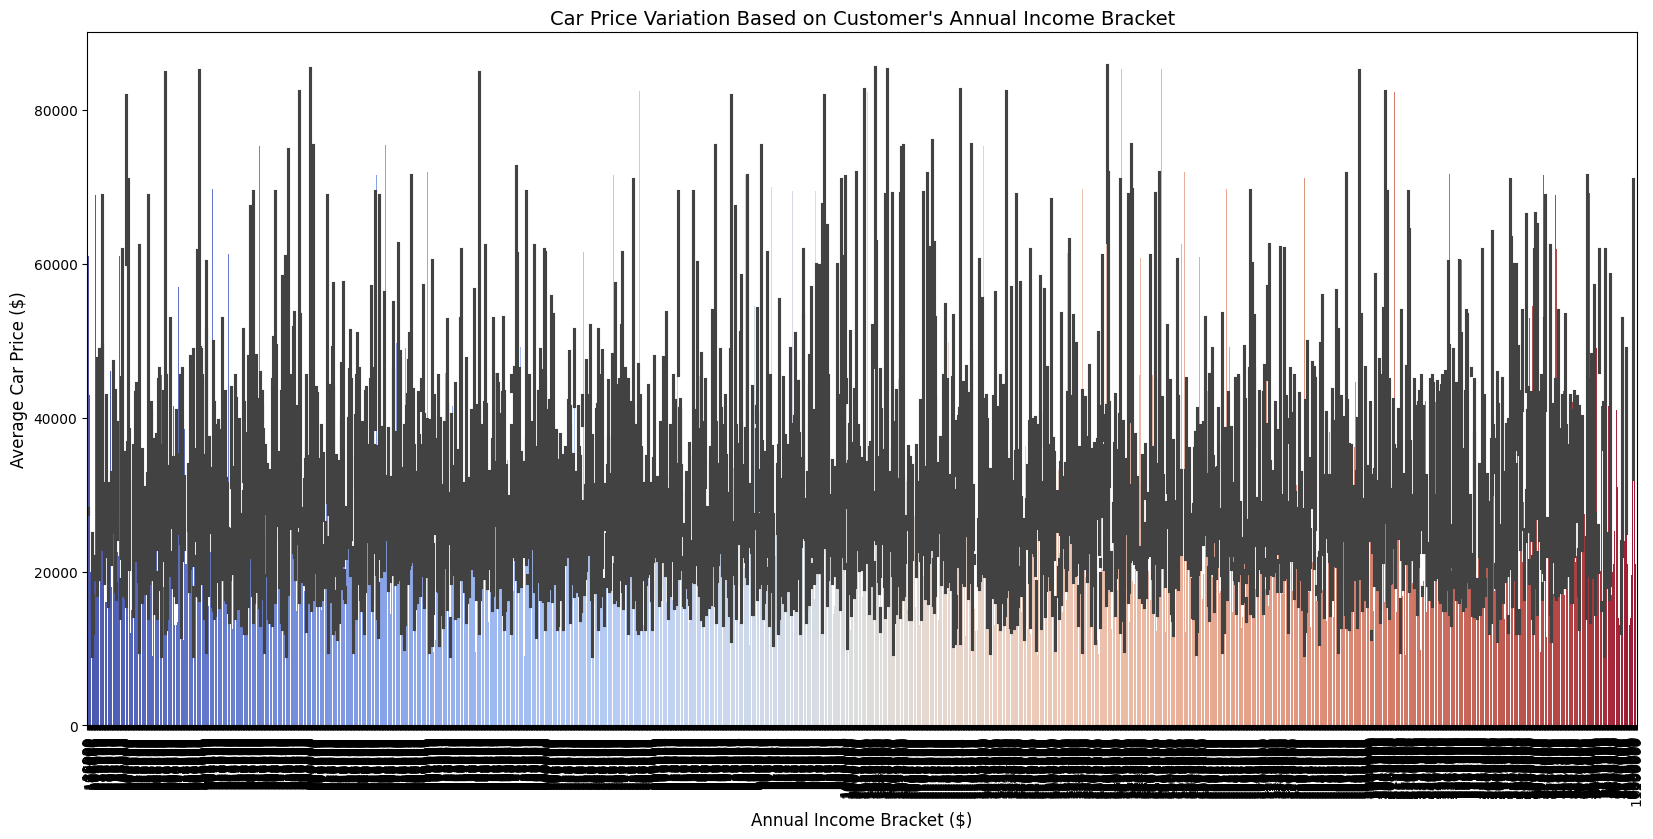

In [87]:
plt.figure(figsize=(20, 9))
sns.barplot(x="Annual Income", y="Price ($)", data=df2, palette="coolwarm")
plt.xlabel("Annual Income Bracket ($)", fontsize=12)
plt.ylabel("Average Car Price ($)", fontsize=12)
plt.title("Car Price Variation Based on Customer's Annual Income Bracket", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Q-10)   What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Ans)


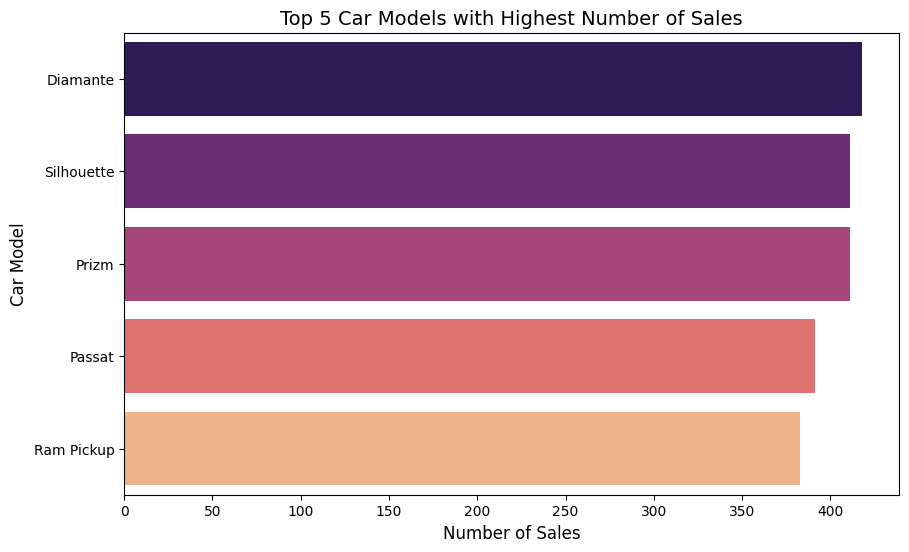

In [90]:
top_5_models = df2["Model"].value_counts().head(5).index
filtered_df = df2[df2["Model"].isin(top_5_models)]

plt.figure(figsize=(10, 6))
sns.countplot(y="Model", data=filtered_df, order=top_5_models, palette="magma")
plt.xlabel("Number of Sales", fontsize=12)
plt.ylabel("Car Model", fontsize=12)
plt.title("Top 5 Car Models with Highest Number of Sales", fontsize=14)
plt.show()

# Q-11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?

Ans)

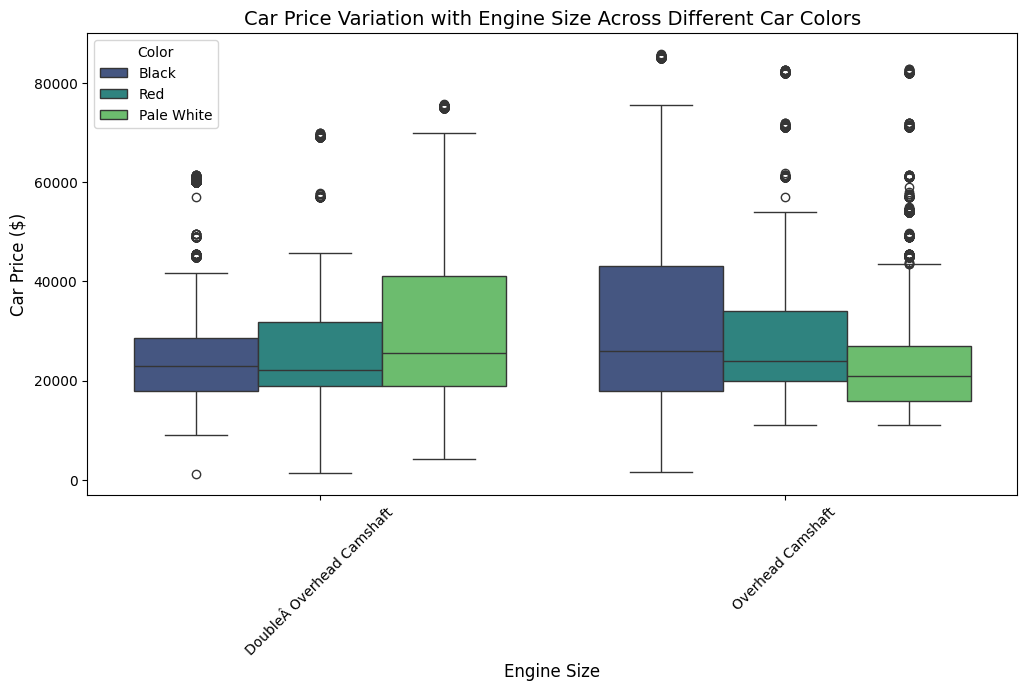

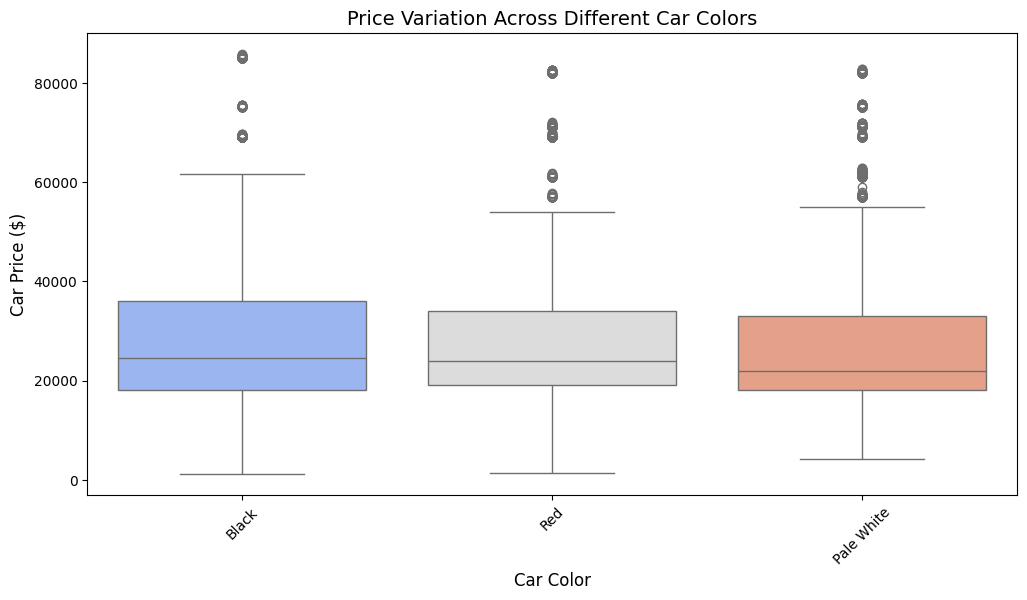

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Engine", y="Price ($)", hue="Color", data=df2, palette="viridis")
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Car Price Variation with Engine Size Across Different Car Colors", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Boxplot to analyze price variation by car color
plt.figure(figsize=(12, 6))
sns.boxplot(x="Color", y="Price ($)", data=df2, palette="coolwarm")
plt.xlabel("Car Color", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Price Variation Across Different Car Colors", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Q-12)  Is there any seasonal trend in car sales based on the date of sale?

Ans)

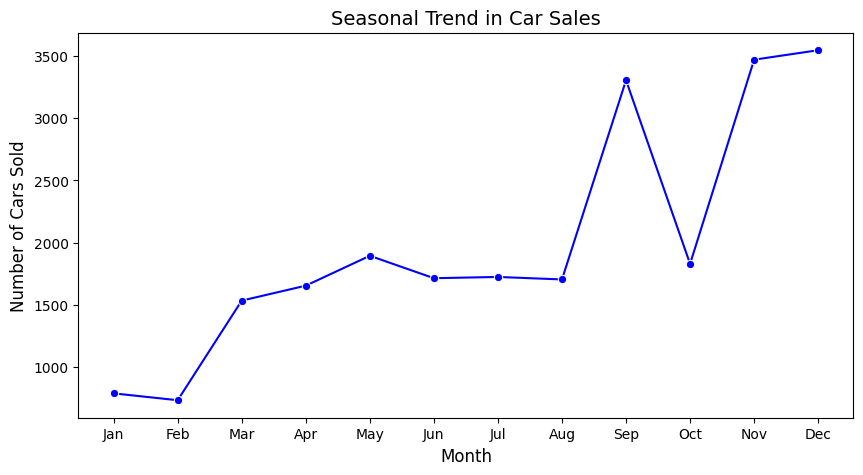

In [105]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2 = df2.dropna(subset=['Date'])

df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

monthly_sales = df2.groupby('Month').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cars Sold", fontsize=12)
plt.title("Seasonal Trend in Car Sales", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Q-13)  How does the car price distribution change when considering different combinations of body style and transmission type?

Ans)

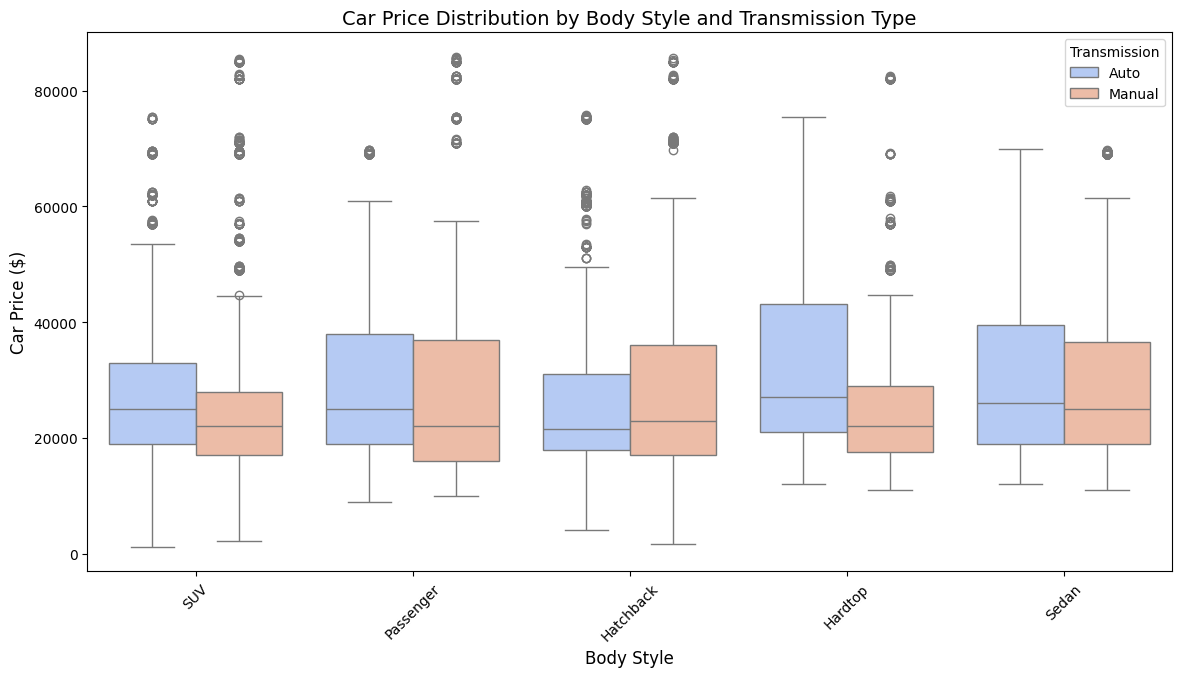

In [108]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df2, palette="coolwarm")
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.title("Car Price Distribution by Body Style and Transmission Type", fontsize=14)
plt.xticks(rotation=45)
plt.show()



# Q-14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

Ans)

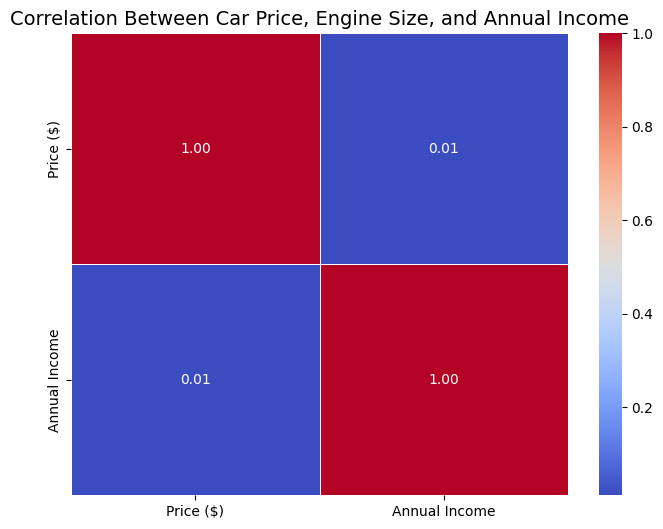

In [112]:
correlation_features = ["Price ($)", "Engine", "Annual Income"]
df2_corr = df2[correlation_features].corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(df2_corr, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Car Price, Engine Size, and Annual Income", fontsize=14)
plt.show()


# Q-15)  How does the average car price vary across different car models and engine types?

Ans)

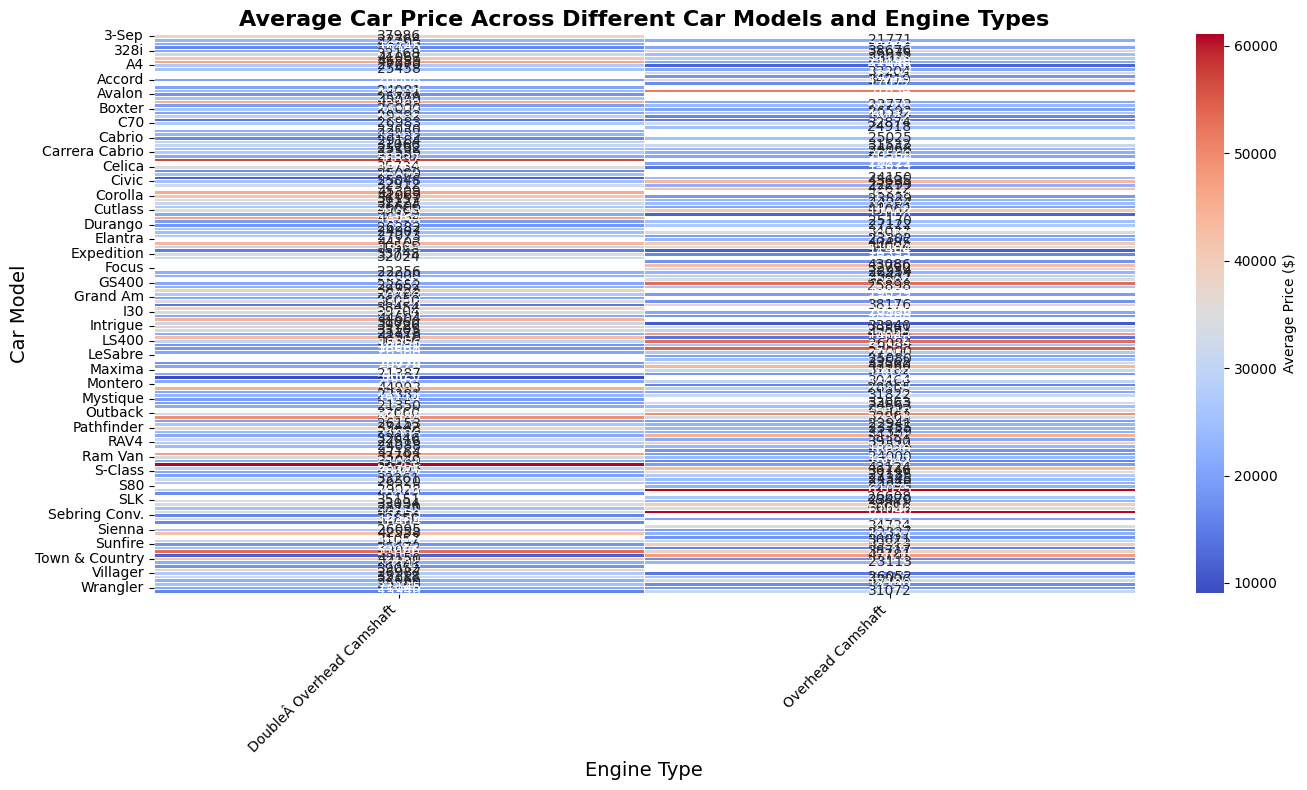

In [114]:
avg_price = df2.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

# Pivot table for visualization
pivot_table = avg_price.pivot(index="Model", columns="Engine", values="Price ($)")

# Heatmap to show average car price across models and engine types
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Average Price ($)'})
plt.xlabel("Engine Type", fontsize=14)
plt.ylabel("Car Model", fontsize=14)
plt.title("Average Car Price Across Different Car Models and Engine Types", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout for better visibility
plt.tight_layout()

# Show plot
plt.show()